<a href="https://colab.research.google.com/github/RaymundoDLC/MachineLearning/blob/main/Unidad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos cargados exitosamente.

Conjunto de Entrenamiento (70%): 13935 muestras
Conjunto de Prueba (30%): 5973 muestras

 Entrenando el modelo de Regresión Logística...
Entrenamiento completado.

--- Resultados de la Regresión Logística ---

### Reporte de Clasificación
               precision    recall  f1-score   support

No Pagado (0)       0.23      0.64      0.34       883
   Pagado (1)       0.91      0.63      0.74      5090

     accuracy                           0.63      5973
    macro avg       0.57      0.63      0.54      5973
 weighted avg       0.81      0.63      0.68      5973


### Matriz de Confusión
[[ 561  322]
 [1883 3207]]

### AUC-ROC Score: 0.6858


/tmp/ipython-input-1870440668.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0], inplace=True)
/tmp/ipython-input-1870440668.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].mode()[0], inplace=True)
/tmp/ipython-input-1870440668.py:49: FutureWarning: A value is trying to be set on a co

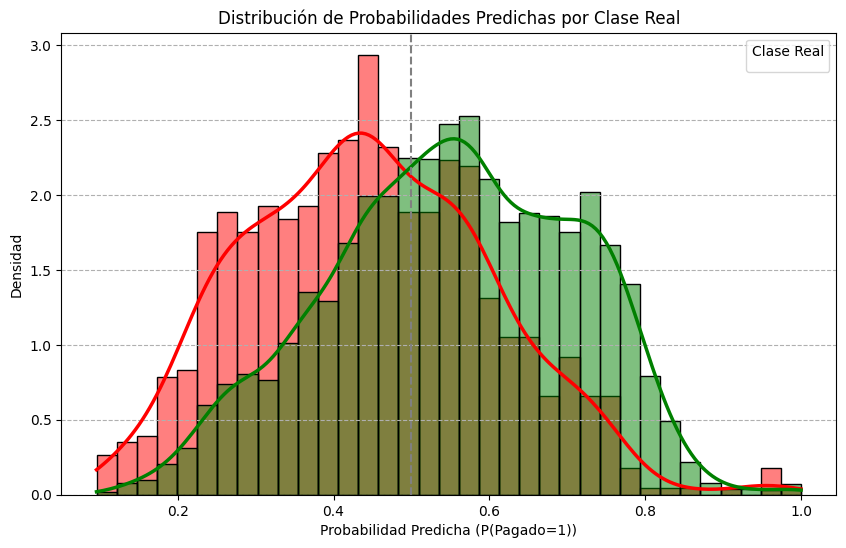

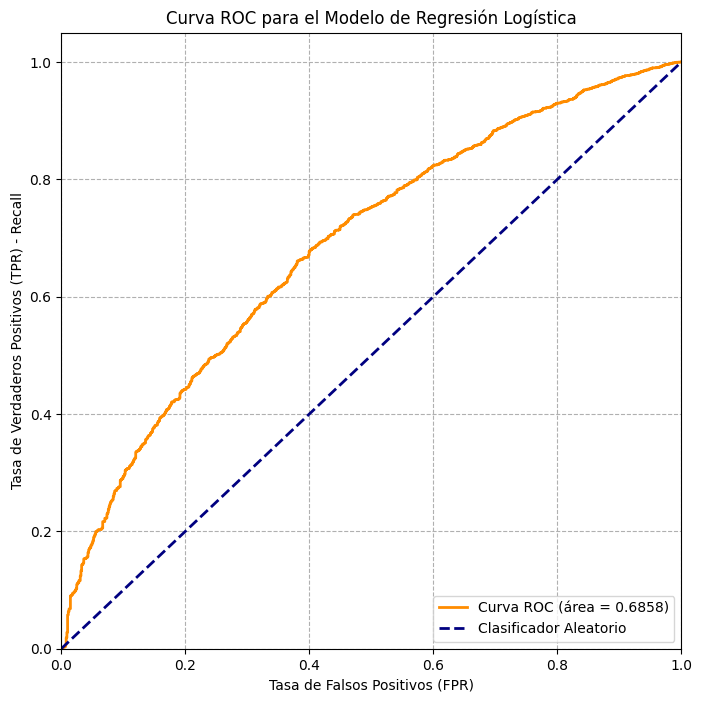


### Coeficientes de Regresión Logística (Influencia en la predicción 'Pagado')
| Feature                       |   Coefficient |
|:------------------------------|--------------:|
| cat__purpose_renewable_energy |      0.568824 |
| cat__purpose_wedding          |      0.407865 |
| num__annual_inc               |      0.339006 |
| cat__grade_A                  |      0.32518  |
| cat__purpose_car              |      0.258246 |
| cat__purpose_major_purchase   |      0.22608  |
| cat__purpose_credit_card      |      0.200824 |
| cat__home_ownership_NONE      |      0.197032 |
| cat__term_36 months           |      0.177517 |
| cat__emp_length_3 years       |      0.155553 |
| Feature                     |   Coefficient |
|:----------------------------|--------------:|
| cat__purpose_other          |     -0.171079 |
| cat__emp_length_10+ years   |     -0.200462 |
| cat__purpose_vacation       |     -0.219563 |
| cat__term_60 months         |     -0.243345 |
| cat__grade_G                | 

In [4]:
##Regresión Logística

# PROYECTO INTEGRADOR: ANÁLISIS DE REGRESIÓN LOGÍSTICA PARA PRÉSTAMOS
# (Basado en proy machine3.pdf)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# --- PARTE 1: Preparación del entorno y los datos ---

# 1. Cargar el dataset (Asegúrate de que el nombre del archivo coincida)
try:
    df = pd.read_csv('lending_club_2007_2011_6_states (1).csv')
    print("Datos cargados exitosamente.")
except FileNotFoundError:
    print("Error: El archivo CSV no se encontró. Asegúrate de haberlo subido a Colab y de que el nombre sea correcto.")
    exit()

# Definir la variable objetivo: 'loan_status'
# La mayoría de los préstamos en Lending Club están 'Fully Paid' (Pagado) o 'Charged Off' (No Pagado)
# Simplificamos a 1 (Pagado) y 0 (No Pagado).

# Seleccionamos solo las etiquetas de interés para la clasificación binaria, excluyendo estados intermedios.
target_map = {'Fully Paid': 1, 'Charged Off': 0}
df = df[df['loan_status'].isin(target_map.keys())].copy()
df['loan_status'] = df['loan_status'].map(target_map)

# 2. Selección de variables significativas
# Variables elegidas basadas en las sugerencias del proyecto (loan_amnt, int_rate, annual_inc, dti, purpose, grade)
# y variables que deberían ser conocidas antes de otorgar el préstamo.
features = [
    'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'purpose', 'grade',
    'term', 'emp_length', 'home_ownership', 'delinq_2yrs', 'open_acc'
]
X = df[features]
y = df['loan_status']

# Limpieza de valores nulos o irrelevantes (Imputación simple o eliminación)
# Para simplificar, llenaremos nulos de variables numéricas con la media y de categóricas con el modo.
for col in ['emp_length', 'home_ownership']:
    X[col].fillna(X[col].mode()[0], inplace=True)
for col in ['dti', 'open_acc', 'delinq_2yrs']:
    X[col].fillna(X[col].mean(), inplace=True)

# 3. Identificación de tipos de variables
numerical_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc']
categorical_features = ['purpose', 'grade', 'term', 'emp_length', 'home_ownership']

# 4. Configuración del Preprocesamiento (Escalamiento y Codificación)
# Se justifica escalar para la Regresión Logística porque minimiza la función de costo con un descenso de gradiente más eficiente.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Escalamiento de Numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # Codificación de Categóricas
    ])

# 5. División del dataset en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nConjunto de Entrenamiento (70%): {X_train.shape[0]} muestras")
print(f"Conjunto de Prueba (30%): {X_test.shape[0]} muestras")


# --- PARTE 2: Entrenamiento de modelos (Regresión Logística) ---

# Crear el pipeline que encadena el preprocesamiento y el modelo
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', max_iter=1000))
    # class_weight='balanced' se agrega para manejar el probable desbalance de clases (más pagados que no pagados)
])

# Entrenar el modelo
print("\n Entrenando el modelo de Regresión Logística...")
logistic_pipeline.fit(X_train, y_train)
print("Entrenamiento completado.")

# 6. Evaluación del modelo
y_pred = logistic_pipeline.predict(X_test)
y_proba = logistic_pipeline.predict_proba(X_test)[:, 1] # Probabilidad de ser clase 1 (Pagado)

print("\n--- Resultados de la Regresión Logística ---")

# a) Reporte de Clasificación
print("\n### Reporte de Clasificación")
print(classification_report(y_test, y_pred, target_names=['No Pagado (0)', 'Pagado (1)']))

# b) Matriz de Confusión
print("\n### Matriz de Confusión")
print(confusion_matrix(y_test, y_pred))

# c) Métrica AUC-ROC
auc_roc = roc_auc_score(y_test, y_proba)
print(f"\n### AUC-ROC Score: {auc_roc:.4f}")

##Graficas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# --- CÓDIGO DE VISUALIZACIÓN ---

# 1. Histograma de Probabilidades Predichas por Clase (Pagado vs. No Pagado)
plt.figure(figsize=(10, 6))
sns.histplot(data=pd.DataFrame({'Probabilidad': y_proba, 'Clase Real': y_test.map({1: 'Pagado', 0: 'No Pagado'})}),
             x='Probabilidad',
             hue='Clase Real',
             kde=True,
             stat='density',
             common_norm=False,
             palette={'Pagado': 'green', 'No Pagado': 'red'},
             line_kws={'linewidth': 2.5})

plt.title('Distribución de Probabilidades Predichas por Clase Real')
plt.xlabel('Probabilidad Predicha (P(Pagado=1))')
plt.ylabel('Densidad')
plt.legend(title='Clase Real')
plt.axvline(x=0.5, color='gray', linestyle='--', label='Umbral de 0.5')
plt.grid(axis='y', linestyle='--')
plt.show()


# 2. Curva ROC (Receiver Operating Characteristic)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) - Recall')
plt.title('Curva ROC para el Modelo de Regresión Logística')
plt.legend(loc='lower right')
plt.grid(linestyle='--')
plt.show()

# d) Interpretación de Coeficientes (Feature Importance)
# Se extraen los coeficientes del modelo de Regresión Logística
log_reg_model = logistic_pipeline.named_steps['classifier']
feature_names = logistic_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Crear un DataFrame para visualizar la importancia
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': log_reg_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\n### Coeficientes de Regresión Logística (Influencia en la predicción 'Pagado')")
print(coefficients_df.head(10).to_markdown(index=False)) # Top 10 que más aumentan la probabilidad de PAGO
print(coefficients_df.tail(10).to_markdown(index=False)) # Top 10 que más disminuyen la probabilidad de PAGO (aumentan la de NO PAGO)

print("\n--- Fin del Análisis ---")